
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./mpi_parallel_run_kirsch.ipynb" download="mpi_parallel_run_kirsch.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=mpi_parallel_run_kirsch.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch.py"><img src="https://img.shields.io/static/v1?label=Source:&message=mpi_parallel_run_kirsch.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>



In [1]:
import os
from pathlib import Path
from subprocess import run

import gmsh
import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot
from mesh import MeshGenerator

### Run *"Solving Kirsch's problem using the release nodal force approach"* with MPI parallel computing

In [2]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)
mesh_dir = Path(out_dir, "Mesh")

#### 1. Mesh generation

In [3]:
if not gmsh.isInitialized():
    gmsh.initialize()

gmsh.model.add("Mesh")

mesh_generator = MeshGenerator(gmsh_model=gmsh.model)
mesh_generator.generate_meshes(out_dir=mesh_dir, order=2)

gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 20%] Meshing curve 2 (Circle)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Line)
Info    : [100%] Meshing curve 10 (Line)
Info    : Done meshing 1D (Wall 0.00289255s, CPU 0.003301s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Transfinite)
Info    : [ 40%] Meshing surface 2 (Plane, Delaunay)
Info    : [ 70%] Meshing surface 3 (Plane, Delaunay)
Info    : Done meshing 2D (Wall 0.00575687s, CPU 0.005817s)
Info    : 1469 nodes 2051 elements
Info    : Writing '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.msh'...
Info    : Done writing '/var/lib/gitlab-runner/builds/F1XUyv4cx

[0] info: Reordering nodes... 
[0] info: Method: Reversing order of nodes unless it is considered correct by the OGS6 standard, i.e. such that det(J) > 0, where J is the Jacobian of the global-to-local coordinate transformation.
[0] info: Corrected 1674 elements.
[0] info: VTU file written.
Create quadratic mesh for /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] 

[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/right.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/top.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/bottom.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/left.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
Create quadratic mesh for /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/arc.vtu
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Create a quadratic order mesh
[0] info: Save the new mesh into a file
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Mesh reading time: 0.0114026 s
[0] info: MeshNodeSearcher construction time: 0.000269928 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 0.000511904 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.00121442 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 6.489e-06 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.000239051 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 1.5733e-05 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.000228745 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 1.6354e-05 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.000235485 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 4.177e-06 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshElements took 0.000221345 s
[0] info: identifySubdomainMesh(): identifySubdomainMeshNodes took 4.087e-06 s
[0

#### 2. Partitioning meshes

In [4]:
bulk_mesh = Path(mesh_dir, "domain.vtu")
num_parts = 3
ot.cli().partmesh("-s", "-i", bulk_mesh, "-o", mesh_dir)
ot.cli().partmesh(
    "-m",
    "-n",
    str(num_parts),
    "-i",
    bulk_mesh,
    "-o",
    mesh_dir,
    "--",
    Path(mesh_dir, "left.vtu"),
    Path(mesh_dir, "right.vtu"),
    Path(mesh_dir, "top.vtu"),
    Path(mesh_dir, "bottom.vtu"),
    Path(mesh_dir, "arc.vtu"),
)

OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Mesh 'domain' read: 4455 nodes, 1674 elements.
[0] info: Property global_node_ids is added to mesh domain
[0] info: Property global_element_ids is added to mesh domain
[0] info: Write the mesh into METIS input file.
[0] info: Total runtime: 0.00905011 s.
[0] info: Total CPU time: 0.008971 s.
OGS_BIN_PATH:  None .

OGS wheel:  ModuleSpec(name='ogs', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7feb42d65430>, origin='/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs/__init__.py', submodule_search_locations=['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/site-packages/ogs']) .

OGS in PATH:  ['/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs', '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/bin/ogs'] .

Please remove OGS from PATH.



[0] info: Mesh 'domain' read: 4455 nodes, 1674 elements.
[0] info: Property global_node_ids is added to mesh domain
[0] info: Property global_element_ids is added to mesh domain
[0] info: METIS is running ...
[0] info: Path to mpmetis is: 
	
[0] info: Running: mpmetis -gtype=nodal "/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.mesh" 3
******************************************************************************
METIS 5.2.1 Copyright 1998-22, Regents of the University of Minnesota
 (HEAD: unknown, Built on: Sep 26 2025, 11:30:11)
 size of idx_t: 64bits, real_t: 32bits, idx_t *: 64bits

Mesh Information ------------------------------------------------------------
 Name: /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain.mesh, #Elements: 1674, #Nodes: 4455, #Parts: 3

Options ------------------

0

#### 3. Parallel computing

In [5]:
output_prefix = "kirsch_mpi"
temporary_project = Path(out_dir, f"{output_prefix}.prj")
prj = ot.Project(
    input_file="kirsch.prj",
    output_file=temporary_project,
)
prj.replace_text(
    output_prefix,
    xpath="./time_loop/output/prefix",
)
prj.write_input()

run(
    f"mpirun -np {num_parts} ogs {temporary_project} -m {mesh_dir} -o {out_dir}",
    shell=True,
    check=True,
)

[0] info: OGS started on 2025-10-30 14:41:04+0100 with MPI. MPI processes: 3.
[0] info: This is OpenGeoSys-6 version 6.5.6-178-g32dbb580952. Log version: 2, Log level: info.
[0] info: Reading project file ../../../../../build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/kirsch_mpi.prj.
[0] info: Reading corresponding part of mesh data from binary file /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain ...
[0] warning: Could not open file '/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh/domain_partitioned_integration_point_properties_cfg3.bin'.
	You can ignore this warning if the mesh does not contain integration_point-wise property data.
[0] info: [time] Reading the mesh took 0.003259 s.
[0] info: Reading corresponding part of mesh data from binary file /var/lib/g

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 423 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0862226 s.
[0] info: Convergence criterion, component 0: |dx|=3.2971e-02, |x|=5.4951e-02, |dx|/|x|=6.0000e-01
[0] info: Convergence criterion, component 1: |dx|=8.0608e-02, |x|=1.3435e-01, |dx|/|x|=6.0000e-01
[0] info: [time] Iteration #1 took 0.0972908 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0123965 s.
[0] info: [time] Applying Dirichlet BCs took 0.000105129 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 112 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0234279 s.
[0] info: Convergence criterion, component 0: |dx|=7.4702e-15, |x|=5.4951e-02, |dx|/|x|=1.3594e-13
[0] info: Convergence criterion, component 1: |dx|=1.5314e-14, |x|=1.3435e-01, |dx|/|x|=1.1399e-13
[0] info: 

[0] info: [time] Assembly took 0.0104358 s.
[0] info: [time] Applying Dirichlet BCs took 0.000161394 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 451 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0912992 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=1.3091e-01, |dx|/|x|=2.9013e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=3.2007e-01, |dx|/|x|=2.9013e-01
[0] info: [time] Iteration #1 took 0.102366 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0124789 s.
[0] info: [time] Applying Dirichlet BCs took 0.000106381 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 46 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0102233 s.
[0] info: Convergence criterion, component 0: |dx|=8.3890e-16, |x|=1.3091e-01, |dx|/|x|=6.4080e-15
[0] in

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 424 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0858612 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=1.6890e-01, |dx|/|x|=2.2488e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=4.1293e-01, |dx|/|x|=2.2488e-01
[0] info: [time] Iteration #1 took 0.0968671 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0123972 s.
[0] info: [time] Applying Dirichlet BCs took 0.000104599 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 43 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.00969629 s.
[0] info: Convergence criterion, component 0: |dx|=6.1291e-16, |x|=1.6890e-01, |dx|/|x|=3.6289e-15
[0] info: Convergence criterion, component 1: |dx|=1.5721e-15, |x|=4.1293e-01, |dx|/|x|=3.8071e-15
[0] info: 

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 474 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0957143 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=2.4486e-01, |dx|/|x|=1.5512e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=5.9865e-01, |dx|/|x|=1.5512e-01
[0] info: [time] Iteration #1 took 0.106841 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0124202 s.
[0] info: [time] Applying Dirichlet BCs took 0.000104899 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 96 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0202293 s.
[0] info: Convergence criterion, component 0: |dx|=5.8706e-15, |x|=2.4486e-01, |dx|/|x|=2.3975e-14
[0] info: Convergence criterion, component 1: |dx|=5.2918e-15, |x|=5.9865e-01, |dx|/|x|=8.8396e-15
[0] info: [t

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 420 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0848747 s.
[0] info: Convergence criterion, component 0: |dx|=3.7982e-02, |x|=3.2083e-01, |dx|/|x|=1.1839e-01
[0] info: Convergence criterion, component 1: |dx|=9.2860e-02, |x|=7.8437e-01, |dx|/|x|=1.1839e-01
[0] info: [time] Iteration #1 took 0.0960333 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0124427 s.
[0] info: [time] Applying Dirichlet BCs took 0.000112711 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 82 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.017457 s.
[0] info: Convergence criterion, component 0: |dx|=1.3166e-15, |x|=3.2083e-01, |dx|/|x|=4.1037e-15
[0] info: Convergence criterion, component 1: |dx|=5.4861e-15, |x|=7.8437e-01, |dx|/|x|=6.9943e-15
[0] info: [t

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 432 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0872048 s.
[0] info: Convergence criterion, component 0: |dx|=2.1013e-02, |x|=3.7982e-01, |dx|/|x|=5.5324e-02
[0] info: Convergence criterion, component 1: |dx|=5.1374e-02, |x|=9.2860e-01, |dx|/|x|=5.5324e-02
[0] info: [time] Iteration #1 took 0.0982922 s.
[0] info: Iteration #2 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0123927 s.
[0] info: [time] Applying Dirichlet BCs took 0.000104257 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 59 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.0128446 s.
[0] info: Convergence criterion, component 0: |dx|=8.6917e-16, |x|=3.7982e-01, |dx|/|x|=2.2884e-15
[0] info: Convergence criterion, component 1: |dx|=9.9211e-16, |x|=9.2860e-01, |dx|/|x|=1.0684e-15
[0] info: [

[0] info: [time] Time step #18 took 0.0185235 s.
[0] info: [time] Output of timestep 18 took 0.00547773 s.
[0] info: Time step #19 started. Time: 318760. Step size: 17280.
[0] info: Solving process #0 started.
[0] info: Iteration #1 started.
[0] info: Number of threads: 1
[0] info: [time] Assembly took 0.0101518 s.
[0] info: [time] Applying Dirichlet BCs took 0.000137067 s.

Linear solver bcgs with bjacobi preconditioner using PRECONDITIONED
converged in 20 iterations (absolute convergence criterion fulfilled).
[0] info: [time] Linear solver took 0.00501521 s.
[0] info: Convergence criterion, component 0: |dx|=1.0903e-16, |x|=3.7982e-01, |dx|/|x|=2.8706e-16
[0] info: Convergence criterion, component 1: |dx|=2.7761e-16, |x|=9.2860e-01, |dx|/|x|=2.9895e-16
[0] info: [time] Iteration #1 took 0.0157352 s.
[0] info: [time] Solving process #0 took 0.0157986 s in time step #19
[0] info: [time] Time step #19 took 0.0185212 s.
[0] info: [time] Output of timestep 19 took 0.00673126 s.
[0] info: 

CompletedProcess(args='mpirun -np 3 ogs /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/kirsch_mpi.prj -m /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/Mesh -o /var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch', returncode=0)

#### 4. Contour plotting of the simulation results

/var/lib/gitlab-runner/builds/F1XUyv4cx/0/ogs/build/release-petsc/Tests/Data/Mechanics/ReleaseNodalForceKirsch/mpi_parallel_run_kirsch/kirsch_mpi.pvd


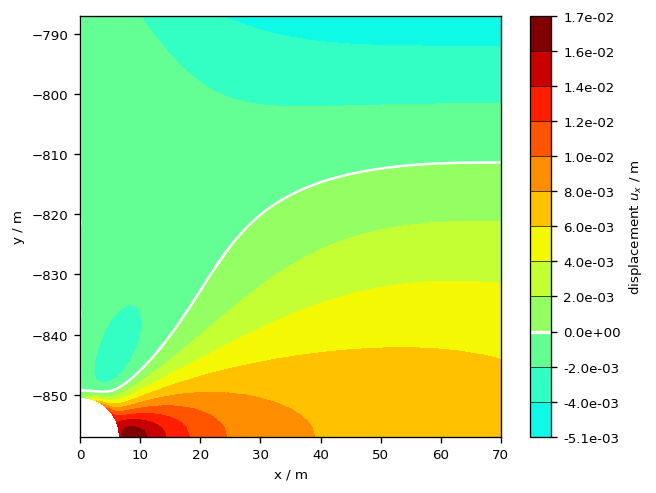

In [6]:
pvd = Path(out_dir, f"{output_prefix}.pvd")
ms = ot.MeshSeries(pvd).scale(time=("s", "d"))
print(pvd)
mesh_last = ms[-1]
fig = mesh_last.plot_contourf(
    ot.variables.displacement["x"],
    figsize=(6, 4),
    fontsize=8,
    cmap="jet",
)

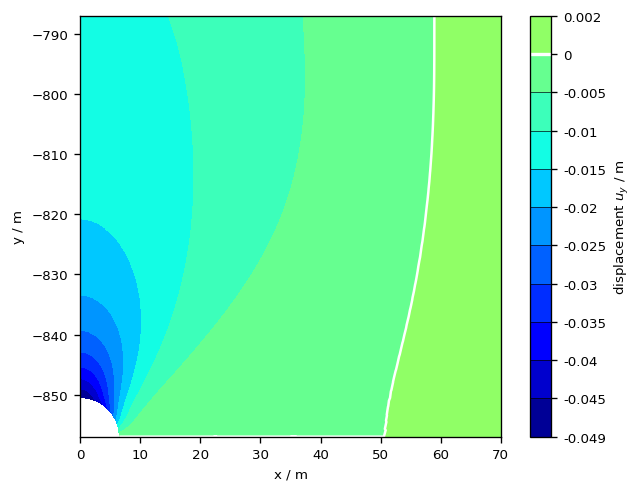

In [7]:
fig = mesh_last.plot_contourf(
    ot.variables.displacement["y"], figsize=(6, 4), fontsize=8, cmap="jet"
)

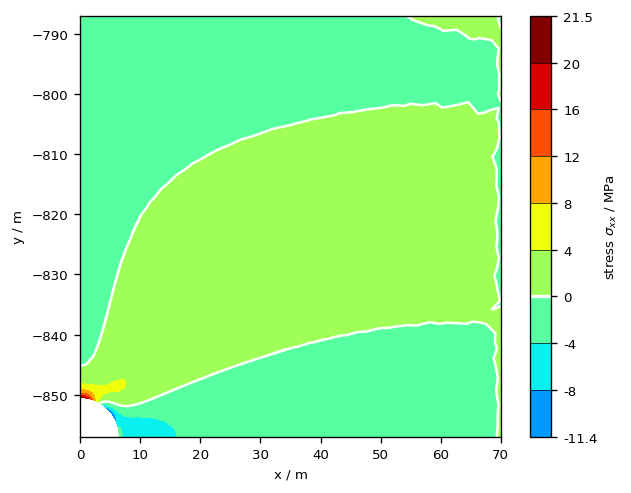

In [8]:
fig = mesh_last.plot_contourf(
    ot.variables.stress["xx"], figsize=(6, 4), fontsize=8, cmap="jet"
)

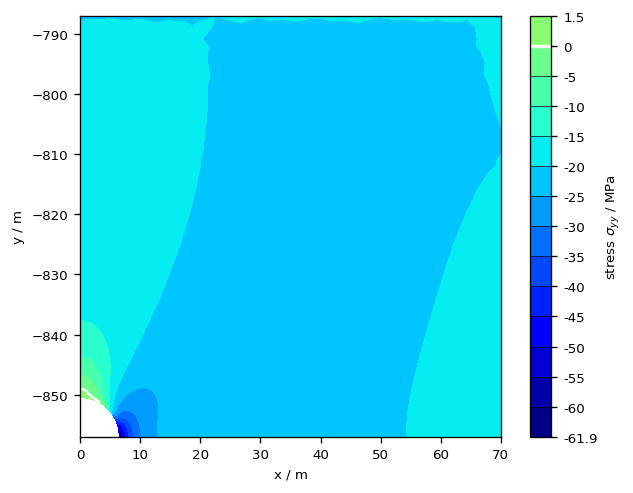

In [9]:
fig = mesh_last.plot_contourf(
    ot.variables.stress["yy"], figsize=(6, 4), fontsize=8, cmap="jet"
)

#### 5. Result comparison

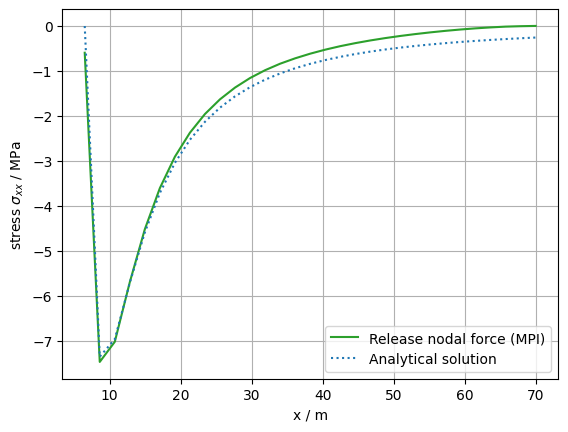

In [10]:
point_a = (6.5, -857.0, 0)
point_b = (70.0, -857.0, 0)
profile = ms[-1].sample_over_line(point_a, point_b, resolution=30)
xs = profile["Distance"] + 6.5
plt.plot(
    xs, profile["sigma"][:, 0] * 1e-6, color="C2", label="Release nodal force (MPI)"
)

a = 6.5
sigma_t = -20  # MPa
sigma_x_a = np.asarray(
    [0.5 * (3.0 * a * a / (r * r) - 3 * a**4 / (r**4)) * sigma_t for r in xs],
)
plt.plot(xs, sigma_x_a, linestyle="dotted", color="C0", label="Analytical solution")
plt.xlabel("x / m")
plt.ylabel(r"stress $\sigma_{xx}$ / MPa")
plt.legend()
plt.grid()
plt.show()

In the above figure, the radial stress $\sigma_r$ profiles along the $\theta = 0^\circ$ axis, obtained using the release nodal force approach,
and the analytical solution, are compared.

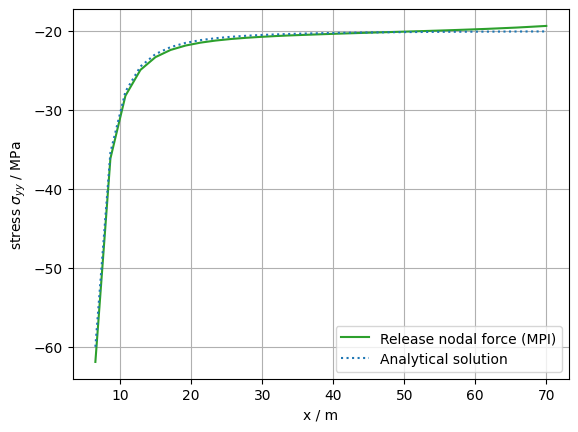

In [11]:
plt.plot(
    xs, profile["sigma"][:, 1] * 1e-6, color="C2", label="Release nodal force (MPI)"
)

a = 6.5
sigma_t = -20  # MPa
sigma_y_a = np.asarray(
    [0.5 * (2 + a * a / (r * r) + 3 * a**4 / (r**4)) * sigma_t for r in xs],
)
plt.plot(xs, sigma_y_a, linestyle="dotted", color="C0", label="Analytical solution")
plt.xlabel("x / m")
plt.ylabel(r"stress $\sigma_{yy}$ / MPa")
plt.legend()
plt.grid()
plt.show()

In the above two figures, the tangential stress $\sigma_{\theta}$ profiles along the $\theta = 0^\circ$ axis,
obtained using the release nodal force approach, and the analytical solution, are compared.

In [12]:
expected_sigma = np.asarray(
    [
        [-5.94322287e05, -6.19135039e07, -1.27523478e07, 2.88857972e04],
        [-7.47350139e06, -3.61722449e07, -7.09372389e06, -4.31847097e03],
        [-7.02632921e06, -2.82291119e07, -4.57663234e06, -3.04634647e03],
        [-5.69811254e06, -2.49548130e07, -3.19587766e06, -2.33539317e03],
        [-4.52129471e06, -2.33397674e07, -2.35831864e06, -1.87907695e03],
        [-3.60618350e06, -2.24352157e07, -1.81241976e06, -1.49642711e03],
        [-2.90810489e06, -2.18773279e07, -1.43562983e06, -1.21999451e03],
        [-2.37358359e06, -2.15068967e07, -1.16414410e06, -1.00559463e03],
        [-1.95790335e06, -2.12450510e07, -9.60886316e05, -8.50316451e02],
        [-1.63102314e06, -2.10507797e07, -8.04540863e05, -7.21601922e02],
        [-1.36956366e06, -2.08999790e07, -6.80862806e05, -6.21075254e02],
        [-1.15718662e06, -2.07782330e07, -5.80625884e05, -5.47100152e02],
        [-9.83183398e05, -2.06769008e07, -4.98025268e05, -4.73813630e02],
        [-8.38590438e05, -2.05896257e07, -4.28464851e05, -2.91454098e02],
        [-7.18847960e05, -2.05193954e07, -3.71473022e05, -5.83689809e02],
        [-6.15597155e05, -2.04493120e07, -3.19472761e05, -2.60734404e02],
        [-5.26222722e05, -2.03832868e07, -2.72852858e05, -1.22193725e02],
        [-4.48460991e05, -2.03225868e07, -2.31314329e05, -1.40384160e02],
        [-3.81052951e05, -2.02633176e07, -1.93311164e05, 8.27105976e00],
        [-3.21267935e05, -2.02058999e07, -1.58150365e05, 1.25229397e02],
        [-2.68380912e05, -2.01489856e07, -1.25209966e05, -2.03819778e02],
        [-2.21121750e05, -2.00919675e07, -9.39267720e04, -5.98779759e02],
        [-1.79147229e05, -2.00335377e07, -6.38054888e04, 6.67763887e02],
        [-1.41291420e05, -1.99727511e07, -3.42127668e04, -2.09343375e02],
        [-1.07444543e05, -1.99093000e07, -5.02336097e03, -6.12146069e02],
        [-7.76109665e04, -1.98407209e07, 2.45004314e04, -3.90010177e02],
        [-5.18790616e04, -1.97699451e07, 5.34527661e04, -3.13328250e02],
        [-3.10211876e04, -1.96869485e07, 8.46090962e04, -3.15443054e01],
        [-1.35909887e04, -1.96029252e07, 1.15045144e05, 3.61051256e02],
        [-4.03024845e03, -1.94999513e07, 1.48805539e05, 7.61397500e02],
        [2.04509604e03, -1.93933612e07, 1.82605155e05, 2.68937637e03],
    ]
)

computed_sigma = np.asarray(profile["sigma"])

np.testing.assert_allclose(actual=computed_sigma, desired=expected_sigma, atol=1e-10)

In [13]:
profile_1 = ms[1].sample_over_line(point_a, point_b, resolution=30)

In [14]:
expected_sigma_at_time_step1 = np.array(
    [
        [-3.43936509e04, -2.24255500e07, -7.37983093e05, 1.67163179e03],
        [-4.32494293e05, -2.09358938e07, -4.10516429e05, -2.49911515e02],
        [-4.06616274e05, -2.04762218e07, -2.64851408e05, -1.76293199e02],
        [-3.29751883e05, -2.02867369e07, -1.84946624e05, -1.35150068e02],
        [-2.61649000e05, -2.01932736e07, -1.36476773e05, -1.08742879e02],
        [-2.08691175e05, -2.01409268e07, -1.04885403e05, -8.65987912e01],
        [-1.68293107e05, -2.01086417e07, -8.30804300e04, -7.06015339e01],
        [-1.37360161e05, -2.00872047e07, -6.73694502e04, -5.81941335e01],
        [-1.13304592e05, -2.00720516e07, -5.56068470e04, -4.92081280e01],
        [-9.43879134e04, -2.00608090e07, -4.65590777e04, -4.17593705e01],
        [-7.92571563e04, -2.00520821e07, -3.94017827e04, -3.59418550e01],
        [-6.69668185e04, -2.00450366e07, -3.36010349e04, -3.16608884e01],
        [-5.68971874e04, -2.00391725e07, -2.88209067e04, -2.74197703e01],
        [-4.85295392e04, -2.00341219e07, -2.47954196e04, -1.68665566e01],
        [-4.15999977e04, -2.00300576e07, -2.14972814e04, -3.37783455e01],
        [-3.56248353e04, -2.00260019e07, -1.84880070e04, -1.50887965e01],
        [-3.04527038e04, -2.00221809e07, -1.57900959e04, -7.07139610e00],
        [-2.59526036e04, -2.00186682e07, -1.33862459e04, -8.12408336e00],
        [-2.20516754e04, -2.00152383e07, -1.11869887e04, 4.78649290e-01],
        [-1.85918944e04, -2.00119155e07, -9.15222018e03, 7.24707160e00],
        [-1.55313028e04, -2.00086219e07, -7.24594709e03, -1.17951260e01],
        [-1.27963975e04, -2.00053222e07, -5.43557708e03, -3.46516064e01],
        [-1.03673165e04, -2.00019408e07, -3.69244727e03, 3.86437434e01],
        [-8.17658683e03, -1.99984231e07, -1.97990549e03, -1.21147786e01],
        [-6.21785551e03, -1.99947512e07, -2.90703760e02, -3.54251197e01],
        [-4.49137538e03, -1.99907825e07, 1.41784904e03, -2.25700334e01],
        [-3.00226051e03, -1.99866866e07, 3.09333137e03, -1.81324219e01],
        [-1.79520762e03, -1.99818836e07, 4.89635973e03, -1.82548063e00],
        [-7.86515552e02, -1.99770211e07, 6.65770509e03, 2.08941699e01],
        [-2.33231970e02, -1.99710620e07, 8.61143168e03, 4.40623553e01],
        [1.18350465e02, -1.99648936e07, 1.05674280e04, 1.55635206e02],
    ]
)


computed_sigma_t1 = np.asarray(profile_1["sigma"])

np.testing.assert_allclose(
    actual=computed_sigma_t1, desired=expected_sigma_at_time_step1, atol=1e-10
)